In [1]:
# Importing Required Libaries.

In [2]:
import anvil.server

anvil.server.connect('server_B4ZRH2C5D6V7DEZRDD3ETIKZ-B32KU57W5XFT6XM4')

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [3]:
from __future__ import absolute_import
from __future__  import division
from __future__ import print_function

In [4]:
import numpy as np
import os
import cv2
import tensorflow as tf
from PIL import Image
from io import BytesIO
import time
from skimage.io import imread
from skimage.transform import resize
from IPython.display import Video, display
import matplotlib.pyplot as plt

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16878240904210961131
xla_global_id: -1
]


In [6]:
print(tf. __version__)

2.7.0


# Model Architecture.

In [7]:
def mamon_videoFightModel2(tf,wight=r'./mamonbest947oscombo-drive.hdfs'):
    layers = tf.keras.layers
    models = tf.keras.models
    losses = tf.keras.losses
    optimizers = tf.keras.optimizers
    metrics = tf.keras.metrics
    num_classes = 2
    cnn = models.Sequential()
    #cnn.add(base_model)

    input_shapes=(160,160,3)
    np.random.seed(1234)
    vg19 = tf.keras.applications.vgg19.VGG19
    base_model = vg19(include_top=False,weights='imagenet',input_shape=(160, 160,3))
    # Freeze the layers except the last 4 layers
    #for layer in base_model.layers:
    #    layer.trainable = False

    cnn = models.Sequential()
    cnn.add(base_model)
    cnn.add(layers.Flatten())
    model = models.Sequential()

    model.add(layers.TimeDistributed(cnn,  input_shape=(30, 160, 160, 3)))
    model.add(layers.LSTM(30 , return_sequences= True))

    model.add(layers.TimeDistributed(layers.Dense(90)))
    model.add(layers.Dropout(0.1))

    model.add(layers.GlobalAveragePooling1D())

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(num_classes, activation="sigmoid"))

    adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.load_weights(wight)
    rms = optimizers.RMSprop()

    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

    return model

In [8]:
np.random.seed(1234)
model22 = mamon_videoFightModel2(tf)
model22.summary()
print(model22)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 30, 12800)        20024384  
 ibuted)                                                         
                                                                 
 lstm (LSTM)                 (None, 30, 30)            1539720   
                                                                 
 time_distributed_1 (TimeDis  (None, 30, 90)           2790      
 tributed)                                                       
                                                                 
 dropout (Dropout)           (None, 30, 90)            0         
                                                                 
 global_average_pooling1d (G  (None, 90)               0         
 lobalAveragePooling1D)                                          
                                                      

C:\Users\73056\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Model Training.

In [9]:
def video_mamonreader(cv2,filename):
    frames = np.zeros((30, 160, 160, 3), dtype=np.float)
    i=0
    print(frames.shape)
    vc = cv2.VideoCapture(filename)
    if vc.isOpened():
        rval , frame = vc.read()
    else:
        rval = False
        frame = None
    if frame is not None:
        frm = resize(frame,(160,160,3))
        frm = np.expand_dims(frm,axis=0)
        if(np.max(frm)>1):
            frm = frm/255.0
        frames[i][:] = frm
        i +=1
        print("reading video")
        while i < 30:
            rval, frame = vc.read()
            frm = resize(frame,(160,160,3))
            frm = np.expand_dims(frm,axis=0)
            if(np.max(frm)>1):
                frm = frm/255.0
            frames[i][:] = frm
            i +=1
    return frames

# Model Testing.

In [10]:
def pred_fight(model,video,acuracy=0.8):
    pred_test = model.predict(video)
    if pred_test[0][1] >=acuracy:
        return True , pred_test[0][1]
    else:
        return False , pred_test[0][1]

In [11]:
def main_fight(vidoss):
    vid = video_mamonreader(cv2,vidoss)
    datav = np.zeros((1, 30, 160, 160, 3), dtype=np.float)
    datav[0][:][:] = vid
    millis = int(round(time.time() * 1000))
    print(millis)
    f , precent = pred_fight(model22,datav,acuracy=0.65)
    millis2 = int(round(time.time() * 1000))
    print(millis2)
    res_mamon = {'fight':f , 'precentegeoffight':str(precent)}
    res_mamon['processing_time'] =  str(millis2-millis)
    return res_mamon

# Prediction.

In [12]:
video_path=r'./videossss.mp4'
res = main_fight(video_path)

C:\Users\73056\AppData\Local\Temp/ipykernel_8612/2375835155.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frames = np.zeros((30, 160, 160, 3), dtype=np.float)


(30, 160, 160, 3)
reading video


C:\Users\73056\AppData\Local\Temp/ipykernel_8612/3585827140.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  datav = np.zeros((1, 30, 160, 160, 3), dtype=np.float)


1711172588194
1711172592238


{'fight': True, 'precentegeoffight': '0.6501253', 'processing_time': '4044'}


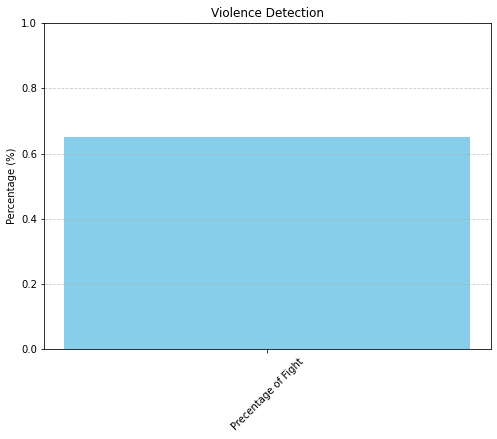

In [13]:
display(Video(video_path))

categories = ['Precentage of Fight']
print(res)
percentages = [float(res["precentegeoffight"])]  # Percentages for each category

# Plot
plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color='skyblue')
plt.ylabel('Percentage (%)')
plt.title('Violence Detection')
plt.ylim(0, 1.0)  # Set the limit for y-axis from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()